In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
175396,52.0,1.0,41.0,0.0,0.068418,157.0,0.615917,0,0,1,1,0,0,0,1
93699,42.0,1.0,28.0,0.0,0.067184,13.0,0.865052,1,1,0,1,0,1,0,0
133448,22.0,1.0,46.0,1.0,0.110294,152.0,0.622837,0,0,1,0,1,0,1,0
49239,55.0,1.0,28.0,0.0,0.070706,152.0,0.148789,0,0,1,1,0,1,0,0
88699,77.0,1.0,18.0,0.0,0.061058,124.0,0.806228,0,1,0,1,0,1,0,0


In [37]:
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
34112,70,1,39,0,0.078488,26,0.695502,0,1,0,1,0,1,0,0
27719,52,1,35,0,0.057580,124,0.557093,1,1,0,1,0,1,0,0
11642,22,1,30,1,0.044927,152,0.653979,0,0,1,0,1,0,1,0
5328,51,1,24,0,0.000000,157,0.003460,0,1,0,1,0,0,0,1
26239,60,1,46,0,0.065190,26,0.712803,0,1,0,1,0,1,0,0


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

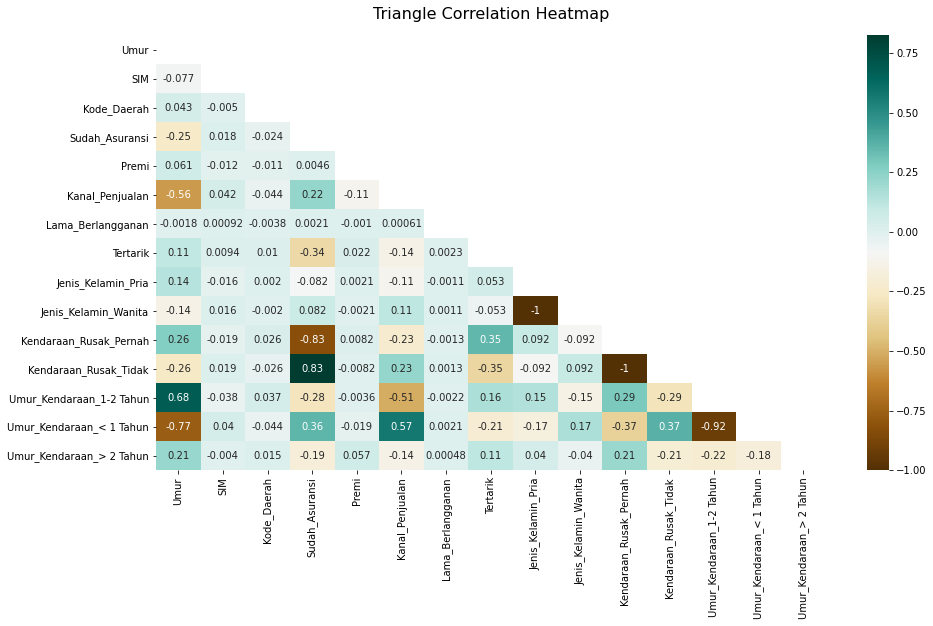

In [38]:
plt.figure(figsize=(15, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)

0    175105
1     24333
Name: Tertarik, dtype: int64


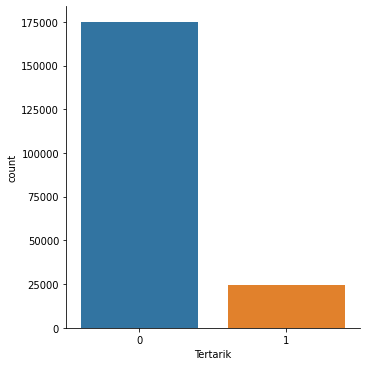

In [39]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')


In [40]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

smt = SMOTE()
x_data, y_data = smt.fit_sample(x_data, y_data)


In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (280168, 14)
x_test shape: (70042, 14)
---------------------------------
y_train shape: (280168,)
y_test shape: (70042,)


## **Tuning Model**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
desc_tree = DecisionTreeClassifier()
desc_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [46]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [47]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {model.score(x_test, y_test) * 100}")

accuracy(desc_tree, 'Decision Tree')
accuracy(knn, 'K-Nearest Neighbour')
accuracy(log_reg, 'Logistic Regression')


Akurasi model Decision Tree: 84.67062619571114
Akurasi model K-Nearest Neighbour: 85.30024842237515
Akurasi model Logistic Regression: 78.91979098255332


In [48]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


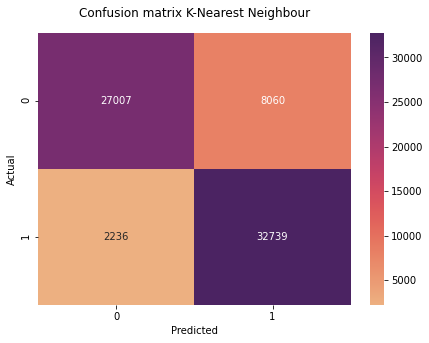


               precision    recall  f1-score   support

           0       0.92      0.77      0.84     35067
           1       0.80      0.94      0.86     34975

    accuracy                           0.85     70042
   macro avg       0.86      0.85      0.85     70042
weighted avg       0.86      0.85      0.85     70042




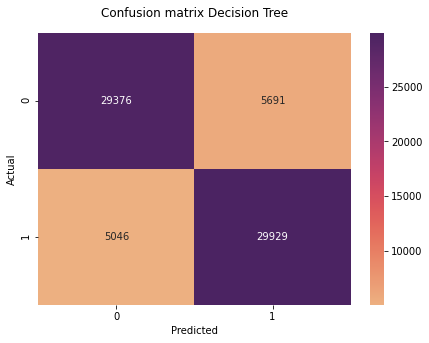


               precision    recall  f1-score   support

           0       0.85      0.84      0.85     35067
           1       0.84      0.86      0.85     34975

    accuracy                           0.85     70042
   macro avg       0.85      0.85      0.85     70042
weighted avg       0.85      0.85      0.85     70042




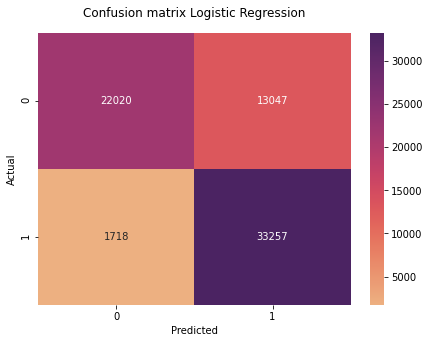


               precision    recall  f1-score   support

           0       0.93      0.63      0.75     35067
           1       0.72      0.95      0.82     34975

    accuracy                           0.79     70042
   macro avg       0.82      0.79      0.78     70042
weighted avg       0.82      0.79      0.78     70042




In [49]:
report(knn, 'K-Nearest Neighbour')
report(desc_tree, 'Decision Tree')
report(log_reg, 'Logistic Regression')